In [180]:
# Importing packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
# Importing the data
df = pd.read_csv('ODI-2020.csv', sep=';')

In [182]:
# Analysis of the first column: What programme are you in
df['What programme are you in?'] = [x.lower() for x in df['What programme are you in?']]

In [183]:
# Manual cleaning of the data due to the small size of the dataset

# Basic symbol and word replacement
df['What programme are you in?']= df['What programme are you in?'].str.replace('&', 'and', case = False) 
df['What programme are you in?']= df['What programme are you in?'].str.replace('qrm', 'quantitative risk management', case = False)
df['What programme are you in?'] = df['What programme are you in?'].map(lambda x: x.lstrip('').rstrip(' '))
df['What programme are you in?']= df['What programme are you in?'].str.replace('cs', 'business analytics', case = False) 

# Simplifying programme names
df['What programme are you in?'][df['What programme are you in?'].str.contains('quantitative risk management', regex=False)] = 'quantitative risk management'
df['What programme are you in?'][df['What programme are you in?'].str.contains('econometrics', regex=False)] = 'econometrics'
df['What programme are you in?'] = df['What programme are you in?'].str.replace('eor', 'econometrics', case = False)
df['What programme are you in?'][df['What programme are you in?'].str.contains('computer science', regex=False)] = 'computer science'
df['What programme are you in?'][df['What programme are you in?'].str.contains('computational science', regex=False)] = 'computational science'

df['What programme are you in?'][df['What programme are you in?'].str.contains('bioinformatics', regex=False)] = 'bioinformatics'
df['What programme are you in?'][df['What programme are you in?'].str.contains('digital business and innovation', regex=False)] = 'business administration'
df['What programme are you in?'][df['What programme are you in?'].str.contains('econometrics and operations research', regex=False)] = 'econometrics and operations research'
df['What programme are you in?']= df['What programme are you in?'].str.replace('ba', 'business analytics', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('business analytics', regex=False)] = 'business analytics'
df['What programme are you in?']= df['What programme are you in?'].str.replace('ai', 'artificial intelligence', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('artificial intelligence', regex=False)] = 'artificial intelligence'
df['What programme are you in?'][df['What programme are you in?'].str.contains('information science', regex=False)] = 'information sciences'
df['What programme are you in?'][df['What programme are you in?'].str.contains('information studies', regex=False)] = 'information studies'
df['What programme are you in?'][df['What programme are you in?'].str.contains('language', regex=False)] = 'human language technology'

# Treating special cases
df['What programme are you in?'][df['What programme are you in?'].str.contains('parallel and distributed computer systems', regex=False)] = 'parallel and distributed computer systems'
df['What programme are you in?']= df['What programme are you in?'].str.replace('exchange', 'erasmus', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('finance and technology', regex=False)] = 'finance and technology'
df['What programme are you in?']= df['What programme are you in?'].str.replace('cls', 'computational science', case = False) 
df['What programme are you in?']= df['What programme are you in?'].str.replace('cps', 'computational science', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('master of finance', regex=False)] = 'finance'
df['What programme are you in?'][df['What programme are you in?'].str.contains('movement', regex=False)] = 'human movement sciences'
df['What programme are you in?'][df['What programme are you in?'].str.contains('datascience', regex=False)] = 'data science'
df['What programme are you in?'][df['What programme are you in?'].str.contains('forensic', regex=False)] = 'forensic science'

# Print the final programme list
program = df['What programme are you in?'].unique().tolist()
count = df['What programme are you in?'].value_counts()
count

business analytics                           104
artificial intelligence                       71
computational science                         31
computer science                              20
quantitative risk management                  16
business administration                        9
information sciences                           4
erasmus                                        4
finance and technology                         4
human language technology                      3
information studies                            2
finance                                        2
fintech                                        1
health sciences                                1
econometrics                                   1
data science                                   1
msc                                            1
forensic science                               1
scientific computing                           1
human movement sciences                        1
parallel and distrib

In [184]:
# Change yes/no answers for columns concerning courses
df['Have you taken a course on information retrieval?']= df['Have you taken a course on information retrieval?'].str.replace('1', 'yes', case = False) 
df['Have you taken a course on information retrieval?']= df['Have you taken a course on information retrieval?'].str.replace('0', 'no', case = False) 
df['Have you taken a course on statistics?']= df['Have you taken a course on statistics?'].str.replace('mu', 'yes', case = False) 
df['Have you taken a course on statistics?']= df['Have you taken a course on statistics?'].str.replace('sigma', 'no', case = False) 
df['Have you taken a course on databases?']= df['Have you taken a course on databases?'].str.replace('ja', 'yes', case = False) 
df['Have you taken a course on databases?']= df['Have you taken a course on databases?'].str.replace('nee', 'no', case = False) 

In [185]:
# Find the number of courses taken per study programme
machine = df.groupby('What programme are you in?')['Have you taken a course on machine learning?'].value_counts().unstack().fillna(0)
info = df.groupby('What programme are you in?')['Have you taken a course on information retrieval?'].value_counts().unstack().fillna(0)
stat = df.groupby('What programme are you in?')['Have you taken a course on statistics?'].value_counts().unstack().fillna(0)
data = df.groupby('What programme are you in?')['Have you taken a course on databases?'].value_counts().unstack().fillna(0)

# Add all courses together for an overview
all_courses = machine + info + stat + data

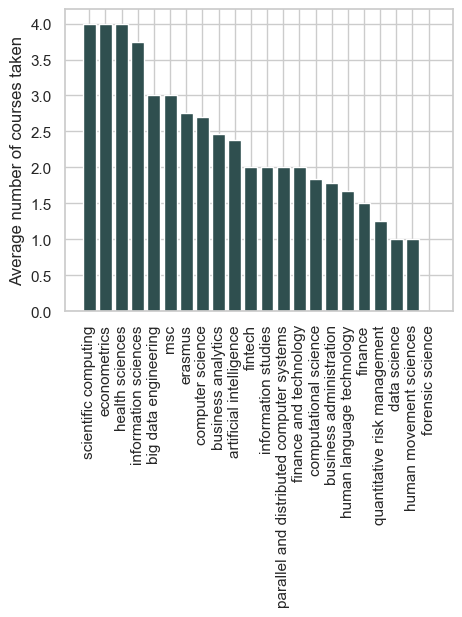

In [189]:
# Calculate the average number of courses taken per study programme
all_courses['students'] = count
all_courses['course_count'] = all_courses['yes']/all_courses['students']

# Sort them to descending order
sorted = all_courses.sort_values(by=['course_count'])
sorted = sorted[::-1]

# Plot the data
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = [5,4]
plt.bar(sorted.index, sorted['course_count'], color='darkslategrey')
plt.xticks(rotation=90)
#plt.xlabel('Study programme')
plt.ylabel('Average number of courses taken')
plt.ylim(0,4.2)
plt.savefig('courses_per_programme.pdf', bbox_inches = 'tight')
plt.show()

In [190]:
# Build the same graph but with transparency corresponding to number of students contributing to the dataset

# Set colors and alpha values
all_courses['students_norm'] = (all_courses['students'] -all_courses['students'].min())/ (all_courses['students'].max() - all_courses['students'].min())
alphas = all_courses['students_norm']
rgba_colors = np.zeros((22,4))
rgba_colors[:,0] = 0
rgba_colors[:,1] = 0
rgba_colors[:,3] = alphas

# Plot the data
#plt.bar(sorted.index, sorted['course_count'], color=rgba_colors)
#plt.xticks(rotation=90)
#plt.ylabel('Average number of courses taken')
#plt.ylim(0,4.2)
#plt.savefig('courses_per_programme2.pdf', bbox_inches = 'tight')
#plt.show()

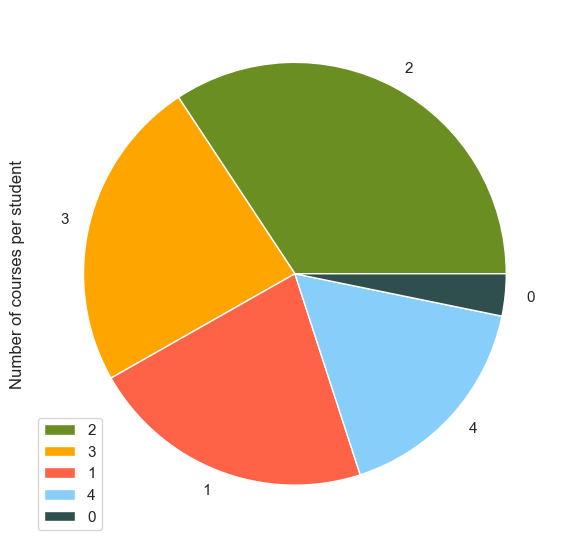

In [191]:
# Calculate the distribution of how many courses per student
df['count_courses1'] = df['Have you taken a course on machine learning?'].apply(lambda x: 1 if x == 'yes' else 0)
df['count_courses2'] = df['Have you taken a course on information retrieval?'].apply(lambda x: 1 if x == 'yes' else 0)
df['count_courses3'] = df['Have you taken a course on statistics?'].apply(lambda x: 1 if x == 'yes' else 0)
df['count_courses4'] = df['Have you taken a course on databases?'].apply(lambda x: 1 if x == 'yes' else 0)
df['Number of courses per student'] = df['count_courses1'] + df['count_courses2'] + df['count_courses3'] + df['count_courses4']

# Plot the data
courses_number = df['Number of courses per student'].value_counts()
courses_number = pd.DataFrame(courses_number)
plot = courses_number.plot.pie(y='Number of courses per student', figsize=(7, 7), colors = ['olivedrab', 'orange','tomato','lightskyblue','darkslategrey'])
plt.savefig('courses_per_student.pdf', bbox_inches = 'tight')
plt.show()

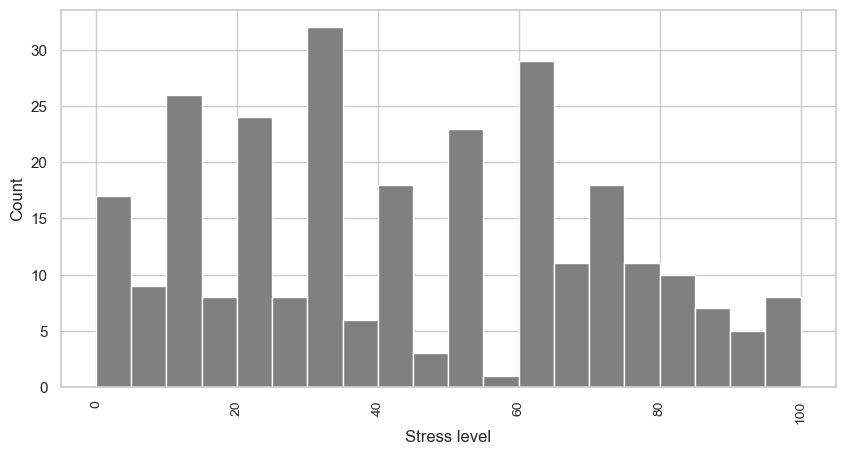

In [196]:
# Analysis of the eleventh column: What is your stress level (0-100)?
df = df[~df['What is your stress level (0-100)?'].str.contains("-")]
df['Stress level'] = pd.to_numeric(df['What is your stress level (0-100)?'],errors='coerce')
drop = df[ (df['Stress level'] <= 0) & (df['Stress level'] >= 100) ].index
df.drop(drop, inplace=True)
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(df['Stress level'], bins=20, color='grey')
#plt.title('What is your stress level (0-100)?')
plt.ylabel('Count')
plt.xlabel('Stress level')
plt.xticks(rotation=90, fontsize=10)
plt.savefig('histogram_stress.pdf',bbox_inches='tight')
plt.show()

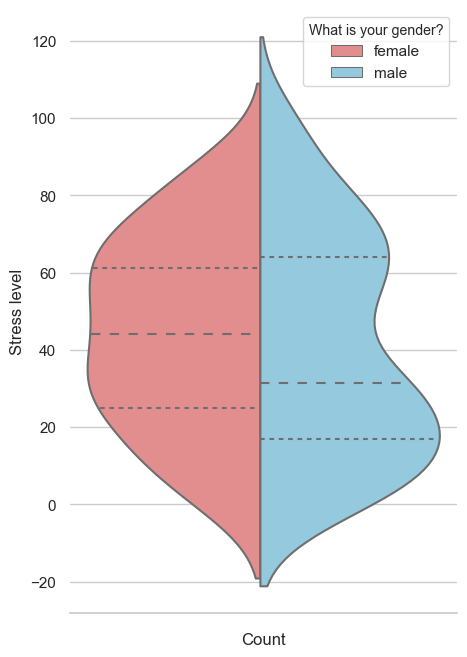

In [197]:
# Generate the data for the stress distribution for males/females
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

df['type'] = ''
df = df[df['What is your gender?'] != 'unknown']
plt.rcParams["figure.figsize"] = [5,8]

# Draw a nested violinplot and split the violins for easier comparison
g = sns.violinplot(x="type", y="Stress level", hue="What is your gender?",
               split=True, inner="quart",
               palette={"male": "skyblue", "female": "lightcoral"},
               data=df)
sns.despine(left=True)
#sns.set(xticklabels=[])
g.set(xlabel=None)
plt.xlabel('Count')
plt.savefig('stress_gender.pdf', bbox_inches = 'tight')
plt.show()

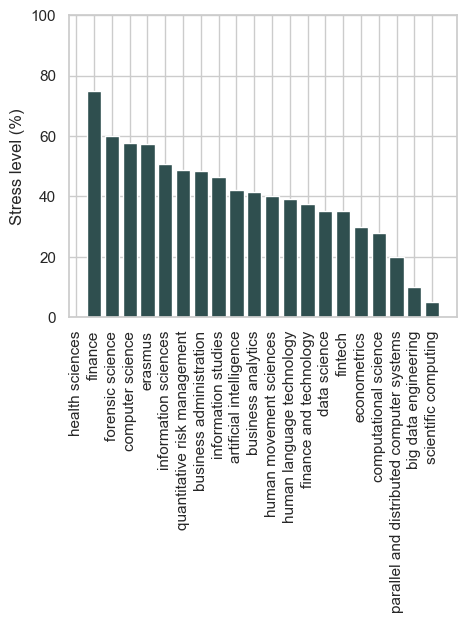

In [252]:
# Stress level and study programme
stress_programme = df.groupby('What programme are you in?')['Stress level'].mean()
stress_programme = pd.DataFrame(stress_programme)
sorted2 = stress_programme.sort_values(by=['Stress level'])
sorted2 = sorted2[::-1]
sorted2 = sorted2.drop('msc')
#sorted2 = sorted2.drop('health')

# Plot the figure
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = [5,4]
plt.bar(sorted2.index, sorted2['Stress level'], color='darkslategrey')
plt.xticks(rotation=90)
plt.ylabel('Stress level (%)')
plt.ylim(0,100)
plt.savefig('stress_per_programme.pdf', bbox_inches = 'tight')
plt.show()